#***1. menyiapkan library & dataset untuk ditraining, & menghubungkan ke drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import os

In [ ]:
# GANTI PATH INI jika Anda menaruh folder di dalam sub-folder lain
# Jika folder 'dataset_skripsi' ada di halaman depan Drive, biarkan seperti ini:
base_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_skripsi'

# Cek apakah folder terbaca
if os.path.exists(base_dir):
    print("✅ Folder dataset ditemukan!")
    print("Isi folder:", os.listdir(base_dir))
else:
    print("❌ Folder tidak ditemukan. Cek nama folder di Google Drive Anda!")

✅ Folder dataset ditemukan!
Isi folder: ['normal', 'leaf_scald', 'leaf_blast', 'defisiensi_k', 'defisiensi_p', 'bacterial_blight', 'brown_spot', 'defisiensi_n']


#***2.Preprocessing & Augmentasi Data***

In [ ]:
# Kita perbanyak data secara buatan agar AI lebih pintar (Rotation, Zoom, Flip)
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalisasi warna (0-255 jadi 0-1)
    rotation_range=30,      # Putar gambar hingga 30 derajat
    width_shift_range=0.2,  # Geser kiri-kanan
    height_shift_range=0.2, # Geser atas-bawah
    shear_range=0.2,        # Miringkan gambar
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Balik horizontal
    fill_mode='nearest',
    validation_split=0.2    # 20% data diambil untuk Ujian (Validasi)
)

In [ ]:
print("\nMenyiapkan Data Latih (Training)...")
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224), # Ukuran standar MobileNetV2
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


Menyiapkan Data Latih (Training)...
Found 3488 images belonging to 8 classes.


In [ ]:
print("\nMenyiapkan Data Uji (Validation)...")
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Menyiapkan Data Uji (Validation)...
Found 867 images belonging to 8 classes.


In [ ]:
# Tampilkan Label Kelas (Penting untuk nanti bikin aplikasi)
class_names = list(train_generator.class_indices.keys())
print("\nLabel Kelas yang dideteksi:", class_names)
print(f"Total Kelas: {len(class_names)}")


Label Kelas yang dideteksi: ['bacterial_blight', 'brown_spot', 'defisiensi_k', 'defisiensi_n', 'defisiensi_p', 'leaf_blast', 'leaf_scald', 'normal']
Total Kelas: 8


#***3. Membangun Model***


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # Bekukan otak utama agar tidak rusak saat latihan awal

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3), # Membuang 30% neuron acak agar tidak menghafal (Overfitting)
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax') # Output layer otomatis sesuai jumlah folder (8)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#***4. Melakukan Trainig Data***

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\n🚀 Mulai Melatih Model AI... (Sabar ya, ini butuh waktu)")
history = model.fit(
    train_generator,
    epochs=20,  # Lakukan 20 putaran (bisa diubah jadi 30-50 jika kurang puas)
    validation_data=validation_generator,
    callbacks=[early_stop]
)


🚀 Mulai Melatih Model AI... (Sabar ya, ini butuh waktu)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1281s 12s/step - accuracy: 0.5006 - loss: 1.3918 - val_accuracy: 0.6724 - val_loss: 0.8560
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.7085 - loss: 0.7412 - val_accuracy: 0.6955 - val_loss: 0.8065
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.7337 - loss: 0.6645 - val_accuracy: 0.7116 - val_loss: 0.7228
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.7558 - loss: 0.6280 - val_accuracy: 0.6770 - val_loss: 0.8382
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.7642 - loss: 0.6130 - val_accuracy: 0.7347 - val_loss: 0.6834
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.7739 - loss: 0.5914 - val_accuracy: 0.6897 - val_loss: 0.8353
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.7778 - loss: 0.5438 - val_accuracy: 0.7186 - val_loss: 0.7397
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.7962 - loss: 0.5356 - val_ac

#***5. Evaluasi Model***

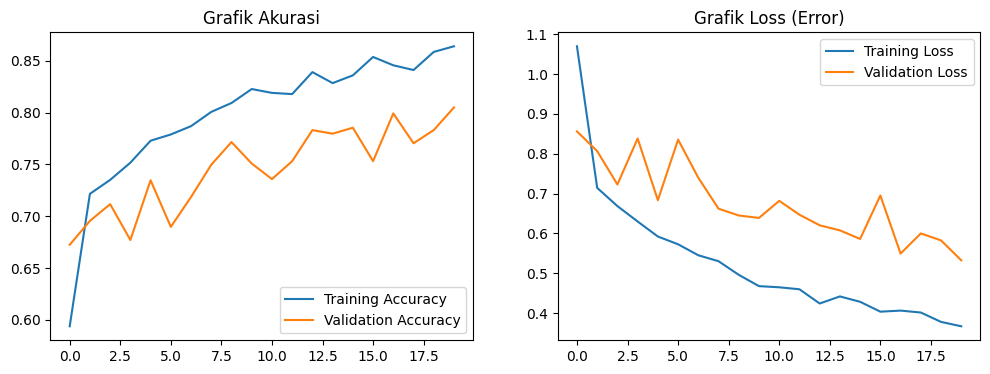

💾 Sedang menyimpan model ke: /content/drive/MyDrive/dataset_skripsi/model_padi_komplit.h5 ...

✅ BERHASIL! Model sudah tersimpan di Google Drive Anda.
Silakan cek folder Google Drive 'dataset_skripsi', file .h5 pasti sudah ada di sana.


In [13]:
save_dir = '/content/drive/MyDrive/dataset_skripsi'
model_filename = 'model_padi_komplit.h5'
model_path = os.path.join(save_dir, model_filename)

# Plot Grafik Akurasi (Tetap ditampilkan buat laporan)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Grafik Akurasi')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss (Error)')
plt.show()

# 2. Simpan Model
print(f"💾 Sedang menyimpan model ke: {model_path} ...")
model.save(model_path)
print("\n✅ BERHASIL! Model sudah tersimpan di Google Drive Anda.")
print("Silakan cek folder Google Drive 'dataset_skripsi', file .h5 pasti sudah ada di sana.")